In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


Missing values   
* Drop columns with NaN
* Imputation
* Extension to imputation

**Load modules and data**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# check the data, look for missing values
print(data.head())                       # review data, missing values
print("_" * 70)
print(data.dtypes, type(data.dtypes))    # what are the column types?
print("_" * 70)
data.dtypes.value_counts()               # column_type - count


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

float64    12
object      8
int64       1
dtype: int64

**What is the model going to predict?**

In [4]:
# The model will predict the 'Price' of the dataset 
y = data.Price

**Prepare features(predictors)**   
Will only use numeric type columns as predictors

In [5]:
melb_predictors = data.drop(['Price'], axis=1)         # drop column 'Price', being target column
X = melb_predictors.select_dtypes(exclude=['object'])  # as-per the requirement, keep only numeric / boolean valued columns

In [6]:
# check the new filtered data frames with predictors(features)
X
# The predictors are ready

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


**Split data into training and validation subsets**

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [8]:
# the data seems it's splited correctly
print(X_train)
print(y_train)
print(X_valid)
print(y_valid)

       Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12167      1       5.0    3182.0       1.0       1.0  1.0       0.0   
6524       2       8.0    3016.0       2.0       2.0  1.0     193.0   
8413       3      12.6    3020.0       3.0       1.0  1.0     555.0   
2919       3      13.0    3046.0       3.0       1.0  1.0     265.0   
6043       3      13.3    3020.0       3.0       1.0  2.0     673.0   
...      ...       ...       ...       ...       ...  ...       ...   
13123      3       5.2    3056.0       3.0       1.0  2.0     212.0   
3264       3      10.5    3081.0       3.0       1.0  1.0     748.0   
9845       4       6.7    3058.0       4.0       2.0  2.0     441.0   
10799      3      12.0    3073.0       3.0       1.0  1.0     606.0   
2732       4       6.4    3011.0       4.0       2.0  1.0     319.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
12167           NaN     1940.0  -37.85984   144.98670        13240.0  
6524 

**Try Three approaches with the model and compare the prediction peformance of each model**

In [9]:
# Approach 1 - Dropping columns with NaN

# What columns have missing values?
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] # if any element in the column is null, then True
print("The columns with missing values: ", cols_with_missing) 
print("_" * 70)

# Drop the colums in both training and validation dataset
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)
print(reduced_X_train) 
print("_" * 70)

print(reduced_X_valid) 
print("_" * 70)


The columns with missing values:  ['Car', 'BuildingArea', 'YearBuilt']
______________________________________________________________________
       Rooms  Distance  Postcode  Bedroom2  Bathroom  Landsize  Lattitude  \
12167      1       5.0    3182.0       1.0       1.0       0.0  -37.85984   
6524       2       8.0    3016.0       2.0       2.0     193.0  -37.85800   
8413       3      12.6    3020.0       3.0       1.0     555.0  -37.79880   
2919       3      13.0    3046.0       3.0       1.0     265.0  -37.70830   
6043       3      13.3    3020.0       3.0       1.0     673.0  -37.76230   
...      ...       ...       ...       ...       ...       ...        ...   
13123      3       5.2    3056.0       3.0       1.0     212.0  -37.77695   
3264       3      10.5    3081.0       3.0       1.0     748.0  -37.74160   
9845       4       6.7    3058.0       4.0       2.0     441.0  -37.73572   
10799      3      12.0    3073.0       3.0       1.0     606.0  -37.72057   
2732       

**Define a helper function to evaluate the model performance, to be used for each model with different approaches (handling missing values), using Random Forest model from scikit-learn, MAE method**

In [10]:
# modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function to build a rnadom forest model and return MAE performance
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)   # create a model
    model.fit(X_train, y_train)   # train the model
    preds = model.predict(X_valid)      # model prediction
    return mean_absolute_error(y_valid, preds)   # return MEA evaluation of real resut vs prediction

In [11]:
# Approach 1 - Simply drop the columns with missing values
print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


In [12]:
# Approach 2 - Imputation - Fill the missing values with imputation 'strategy'
# the process of filling in missing values with appropriate replacements, enabling the data to be used effectively in machine learning algorithms.
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer() # default strategy='mean'

# fit the imputer into the data and transform the data - train, valid dataset both
# Be aware the df will loose column names after imputation
# Make the imputed dataset as DataFrame, so you can restore columns to it, otherwise it will remain ans ndarray
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))  # apply the same imputer used with X_train
#print(imputed_X_train.columns)
#print(imputed_X_train)
#print(imputed_X_valid.columns)
#print(imputed_X_valid)

# Restore the column names for the imputed data (ndarray)
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
#print(imputed_X_train.columns)
#print(imputed_X_train)
#print(imputed_X_valid.columns)
#print(imputed_X_valid)

# Evaluate the model using the helper function
print("MAE from Approach 2 (Imputation): ")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

# Note that WApproach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset

MAE from Approach 2 (Imputation): 
178166.46269899711


**Note that Approach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset**

In [13]:
# Approach 3 - Extension to Imputation - Apply Imputation as approach2, with indication for the columns that are imputed

# Work with copies of the original datasets, Will add flag comlumns to them.
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# What columns are you imputing? Make new columns to mark them with Boolean value.
# Any column with null value(NaN) will be imputed.
# Make new colums for them, and mark with Boolean value
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train[col].isnull()  # True if the cell(value) was null
    X_valid_plus[col + '_was_missing'] = X_valid[col].isnull()  # True if the cell(value) was null

# Check the relevant columns quickly and verify if the values are correct, side-by-side
X_train_plus.loc[:,cols_with_missing + [col+'_was_missing' for col in cols_with_missing]]
# The new columns look good.

# Now impute the columns with missing values as Approach 2.
imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(imputer.fit_transform(X_valid_plus))

# Restore columns to the new df, where lost during imputation
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Check the new df's quickly
imputed_X_train_plus
imputed_X_valid_plus
# Now see, no NaN columns and new flag columns with 1 or 0 values

# Evaluate the model using the helper function
print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))
# Now see that Approach 3 performed slightly worse than Approach 2.
    

MAE from Approach 3 (An Extension to Imputation):
179986.2708570026


**Now see that Approach 3 performed slightly worse than Approach 2.**

**So, why did imputation perform better than dropping the columns?**    
> The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

### As is common, imputing missing values (in Approach 2 and Approach 3) yielded better results, relative to when we simply dropped columns with missing values (in Approach 1).

**Exercise: Missing Values**

> ---
> # Categorical Variables
> ---
 
* Only a limited number of values
* Error with most machine learning models in Python without preprocesing them first
* Three general approaches for preprocessing the column(s) with categorical variables
    1. Drop categorical variables (the simplest, but the worst performace in general)
    1. Ordianl encoding (Change the value of categorical variables to ranking-type integers, Tree-based models works well with this.
    1. One Hot encoding (Add new columns with unique categorical values from the column, encode each with 1/0, like attaching a wide-pivot columns). To use when the categorical variables are norminal variables (not in intrinsic ranking). Recommended to use when cardinality is < 15
* Work flow

Dataset to use: /kaggle/input/melbourne-housing-snapshot/melb_data.csv

In [14]:
# Load modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# Load data
data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")


# Separate target from predictors (features)
y = data['Price']  # target - he model will predict values for this column
X = data.drop(['Price'], axis=1) # features - everything else except the target column


# Split the data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


# Preprocess - Drop columns with missing values 
  # 1. Get columns with missing values 
cols_with_missing = [ col for col in X_train_full.columns if X_train_full[col].isnull().any() ] # ['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

  # 2. Drop the columns (simplest approach applied here)
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)


# Preprocess - construct data with columns in categorical or numerical values only

  # 1. Get the categorical variable columns with low cardinality only (<10)
low_cardinality_cols = [ cname for cname in X_train_full.columns if X_train_full[cname].dtype =='object' 
                        and X_train_full[cname].nunique() < 10 ]  # ['Type', 'Method', 'Regionname']

  # 2. Select numerical columns
numerical_cols = [ cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64'] ]  # ['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']

  # 3. Construct data with only the columns selected above - low cardinality columns + numerical colums
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


# Check the final dataset for modeling
#print(X_train.head(), "\n")


# Build, train and test a model applying the choice of categorical variable preprocessing approach
# To define a helper funcdtion for model building, training, testing, measuring - Using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)


# Try each approach of categorical variable preprosessing using the helper function

# 1. Approach 1 (Drop Categorical Variables)
drop_X_train = X_train.select_dtypes(exclude=['object'])  # filter out the columns in string types and object types
drop_X_valid = X_valid.select_dtypes(exclude=['object'])  

print("1. MAE score from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

# 2. Approach 2 (Ordinal Encoding)
# Apply OrdinalEncoder to each categorical value column
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

ordinal_encoder = OrdinalEncoder()
label_X_train[low_cardinality_cols] = ordinal_encoder.fit_transform(X_train[low_cardinality_cols])
label_X_valid[low_cardinality_cols] = ordinal_encoder.transform(X_valid[low_cardinality_cols])

print("2. MAE score from Approach 2 (Ordinal Encoding:")
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

# 3. Approach 3 (One-Hot Encoding)
# Apply one-hot encoder to each column with categorical data
# handle_unknown='ignore'to avoid errors when the validation data contains classes that aren't represented in the training data
# sparse=False to return encoded columns as numpy arrays rather than sparse matrix
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# Chceck the dataset for encoded columns
#print(X_train[low_cardinality_cols])
#print(OH_cols_train)
#print(X_train.index)
#print(OH_cols_train.index)

# One-hot encoding removed index; put it back - the row labels
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features - Combine the numerical columsn + hot-encoded categorical columns
# For final dataset for modeling and testing
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type - One-Hot encoded columns with column names in number
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

print("3. MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))



1. MAE score from Approach 1 (Drop categorical variables):
175703.48185157913
2. MAE score from Approach 2 (Ordinal Encoding:
165936.40548390493
3. MAE from Approach 3 (One-Hot Encoding):


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


166089.4893009678


## Which approach is best?
### In this case, dropping the categorical columns (Approach 1) performed worst, since it had the highest MAE score. As for the other two approaches, since the returned MAE scores are so close in value, there doesn't appear to be any meaningful benefit to one over the other.
 
### In general, one-hot encoding (Approach 3) will typically perform best, and dropping the categorical columns (Approach 1) typically performs worst, but it varies on a case-by-case basis.

**Exercises: Categorical Values**

> ---
> # Pipelines
> ---
 
* Simple way to keep the codes organized by bundling the steps in processing + modeling
* Cleaner Code
* Fewer Bugs
* Easier to Productionize
* More OPtions for Model validation

Dataset to use: Melbourne Housing dataset
/kaggle/input/melbourne-housing-snapshot/melb_data.csv

### Pipelines are valuable for cleaning up machine learning code and avoiding errors, and are especially useful for workflows with sophisticated data preprocessing.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data 
data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

# Sparate target from predictors
y = data.Price 
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Extract columns in categorical / numerical values of your interest, they will be fed into the model of your choice.
# Conversion of categorical values to numerics are crucial since most of the pre-defined models are based on to 
# use numeric values.
# 
# Categorical columns with low Cardinality (<10)
categorical_cols = [ col for col in X_train_full.columns if X_train_full[col].nunique() < 10 
                   and X_train_full[col].dtype == 'object' ]
print(categorical_cols, len(categorical_cols))

# Numerical columns
numerical_cols = [ col for col in X_train_full.columns if X_train_full[col].dtype in ['int64','float64']]
print(numerical_cols, len(numerical_cols))

# Filter dataset with the selected column names
my_cols = categorical_cols + numerical_cols
print(my_cols, len(my_cols))
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



['Type', 'Method', 'Regionname'] 3
['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'] 12
['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'] 15


In [16]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


**Construct full pipeline in Three Steps**

### **STEP 1: Define Preprocessing Steps - Transformers|**   
Use **ColumnTransformer** class to bundle different preprocessing steps

In [17]:
# Scenario
# 1. Impute missing values in numerical data
# 2. Impute missing values and applies a one-hot encoding to categorical data

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Prepocessing for numerical data
# Use this transfomer as defined to process the null values in numerical values
numerical_transformer = SimpleImputer(strategy='constant')  # default = None

# Preprocessing for categorical data
# Use this transformer as defined to process the null values in categorical values and convert them into numberical values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
# Define the preprocessor for model by bundling the preprocessors defined abovve, Will be used to build a model.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


## STEP2: Bundle transformers and define a preprocessor for the model

In [18]:
# Bundle preprocessing for numberical and categorical data
# - ColumnTransformer Class
ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='constant'),
                                 ['Rooms', 'Distance', 'Postcode', 'Bedroom2',
                                  'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                                  'YearBuilt', 'Lattitude', 'Longtitude',
                                  'Propertycount']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type', 'Method', 'Regionname'])])

## STEP 3: Define your Model to use

In [19]:
# Will use Randome Forest Model - RandomForestRegressor (in this code base)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [20]:
# Create a Pipeline - Combine the bundled preprosessor and the model - Pipeline Class
# ** With the pipeline, we preprocess the training data and fit the model in a single line of code. 
# (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. 
# This becomes especially messy if we have to deal with both numerical and categorical variables!)
# ** With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and 
# the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, 
# we have to remember to preprocess the validation data before making predictions.)


from sklearn.metrics import mean_absolute_error

# Bundling preprocessing + modeling code in a pipline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Preprocessing of training data, fit model - feed the 'untrained', 'unprocessed' raw data to the Pipeline
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions - feed the 'validation' data to the Pipeline
preds = pipeline.predict(X_valid)

# Evaluate the model - MAE, mean_ablouste_error (in this code base)
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)



MAE: 160679.18917034855


**Exercise: Pipelines**

# Cross-Validation    
> **More accruate way of measuring the model performancde**

What is Cross-Validation     
Why do you need Cross-Validation    
When do you use Cross-Validation

In [4]:
import pandas as pd

# Read the dta
data = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')
print(data.head())

# Select predictors, and build a dataset for model
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Seelct target
y = data.Price

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [20]:
# Build a Pipeline for data preprocessing and model bundling
# Using Pipeline with cross-validation makes the code remarkably straighforward

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])


In [23]:
# Apply Cross-Validation measues to the model
# Use cross_val_score() from sklearn, set no of folds with cv parameter

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores using CV(5):\n", scores)

MAE scores using CV(5):
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


In [24]:
# Get average score, so can be used for comparison with other models.
print("Average MAE score (across experiments - CV(5))")
print(scores.mean())

Average MAE score (across experiments - CV(5))
277707.3795913405


**Exercise: Cross-Validation**

In [34]:
# Tuning your ML with cross-validation

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv("/kaggle/input/housing-prices-competition-for-kaggle-learn-users/train.csv")
test_data = pd.read_csv("/kaggle/input/housing-prices-competition-for-kaggle-learn-users/test.csv")

# Remove rows wtih missing value for target column, set target
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice

# Select numeric columns only - for this project
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]

# Set the train and test dataset with the selected predictors
X = train_data[numeric_cols].copy()
X_test = train_data[numeric_cols].copy()

In [41]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [43]:
# Define a Pipeline for preprocessing and model bundling
# Use SimpleIimputer and RandomForestRegressor in this project

pipeline = Pipeline(steps=[
    ('preprocess', SimpleImputer()), # default - mean of other values
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [46]:
# Use the pipeline and apply cross_validation for scoring.
# folds = 5, method = negative mean aboslute error

from sklearn.model_selection import cross_val_score

# muliply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(pipeline, X, y,
               cv=5,
               scoring='neg_mean_absolute_error')

print("Average MAE score(folds=5):", scores.mean())

Average MAE score(folds=5): 629.9807534246576


**Step 1: Write a useful helper function that:**

**Reports the average (pver three corss-validation folds) MAE of a ML pipeline that uses**
* create folds for data X, and y
* use SimpleImputer() with default parameter value
* Use RandomForestRegressor() with random_state=0 for the model

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # define pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
       
    # measure CV scores
    scores = -1 * cross_val_score(pipeline, X, y,
                    cv=3,
                    scoring='neg_mean_absolute_error')
    
    return scores.mean()

**Step 2: Test different parameter values**    
1. Use the helper funtion get_score
1. Measure performaces for eight different the number of trees - 50, 100, 150, 200, ... ,300, 350, 400
1. Store the results in a Python dictionary, where results[i] = get_score(i)

In [50]:
results = {}

for i in range(50,400+50, 50):
    results[i] = get_score(i)
    

In [51]:
results

{50: 730.653707787946,
 100: 721.7868980319589,
 150: 709.4016717132882,
 200: 687.1053192046716,
 250: 678.0487947316088,
 300: 675.0647945250495,
 350: 672.3047603636147,
 400: 675.9250371595641}

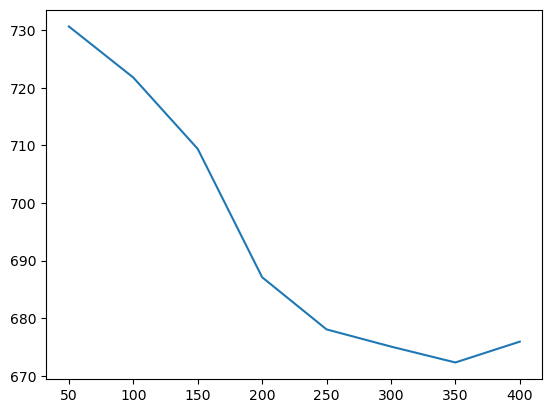

In [53]:
# visualize the results

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

**Step 3: Find the best parameter value**

In [57]:
n_estimators_best = min(results, key=results.get)
print(n_estimators_best, results[n_estimators_best])

350 672.3047603636147


# XGBoost (Extreme Gradient Boost)   
* The most accurate model for structured data
* A powerful technique that achieves state-of-the-art results on a variety of datasets.

We refer to the random forest method as an "**ensemble method**". By definition, ensemble methods **combine the predictions of several models** (e.g., several trees, in the case of random forests).    
Another ensemble method - **graident boosting**   
**Gradient boosting** is a method that goes through **cycles to iteratively add models into an ensemble**.    
1. It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
1. These predictions are used to calculate a loss function (like mean squared error, for instance).
1. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
1. Finally, we add the new model to ensemble, and ...
1. ... repeat!    
![Gradient Boosting](https://storage.googleapis.com/kaggle-media/learn/images/MvCGENh.png)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

# Select subset of predictors - some numerical values only for this project
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select taget for prediction
y = data.Price

# Seperate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [3]:
# Model building and training
# To use Scikit-learn xgboost.XGBRegressor in this example
# XGBoost stands for extreme gradient boosting, which is an implementation of 
# gradient boosting with several additional features focused on performance and speed

from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [4]:
# Model prediction and evaluation
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absoulte Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absoulte Error: 243131.2653937316


**parameter tuning**    
Dramatic affects on accuracy and training speed

**n_estimators**: 
* modeling cycle = the # of models in ensemble (100 - 1000)
* too low - too high: overfitting - underfitting   

**early_stopping_rounds**
automatic finding of ideal estimator and stop the cycle in the middle, set n_estimator hight and use early_stopping_rounds, if set to 5, allowing 5 straight rounds of deteriorating validation scores.
set aside some data for calculating the validation scores - eval_set parameter
early_stopping_rounds=5 is a reasonable choice.    

**learning_rate**    
multiply the predictions from each model by a small number -learning rate, before adding them in.   

learning_rate parameter is a hyperparameter that determines the step size at each iteration when updating the model's weights during the gradient boosting process. It controls the contribution of each weak learner (tree) to the ensemble.

When you apply XGBoost for gradient boosting, the algorithm iteratively adds weak learners to the ensemble to correct the errors made by the previous learners. The learning_rate plays a crucial role in controlling the impact of each weak learner on the final model. It is also known as the shrinkage parameter or step size.

Here's how the learning_rate works:

Smaller Learning Rate: A smaller value of learning_rate (usually in the range [0, 1]) results in smaller steps during each iteration. It makes the model more robust and stable but requires a higher number of iterations to reach optimal performance. A smaller learning rate generally leads to better generalization and helps prevent overfitting.

Larger Learning Rate: A larger value of learning_rate allows the model to learn faster, as it takes larger steps during each iteration. However, a high learning rate can also make the model more sensitive to noise and lead to overfitting if not tuned properly.

Adjusting the learning_rate is a crucial part of hyperparameter tuning in XGBoost. You typically perform a grid search or random search over a range of values to find the optimal learning rate that provides the best trade-off between model performance and training speed.

It's important to note that the learning_rate parameter is inversely proportional to the n_estimators parameter (number of boosting rounds). A smaller learning rate usually requires more boosting rounds to achieve comparable performance to a larger learning rate.

**n_jobs**    
n_jobs = number of cores on your machine, utilizing parallelism on large dataset to build models faster.   
No effect on smaller datasets
Micro-optimizing for fitting time is only good for large dataset





In [8]:
# Utilizing the parameters for XGB model

my_model = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)],
             verbose=False)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=4, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

**If you later want to fit a model with all of your data, set n_estimators to whatever value you found to be optimal when run with early stopping.**

## XGBoost is a leading software library for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). With careful parameter tuning, you can train highly accurate models.

**Exercise: XGBoost**

# Data Leakage (or leakage)   
Find and fix this problem that ruins your model in subtle ways   
* One of the most important concepts for practicing data scientists.   
* If you don't know how to prevent it, leakage will come up frequently, and it will ruin your models in subtle and dangerous ways.    

**Data leakage** (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate.    

**Target leakage and Train-test Contamination.**   
**Target leakage** occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.

An example will be helpful. Imagine you want to predict who will get sick with pneumonia. The top few rows of your raw data look like this:

got_pneumonia	age	weight	male	took_antibiotic_medicine	...
False	65	100	False	False	...
False	72	130	True	False	...
True	58	100	False	True	...
People take antibiotic medicines after getting pneumonia in order to recover. The raw data shows a strong relationship between those columns, but took_antibiotic_medicine is frequently changed after the value for got_pneumonia is determined. This is target leakage.

The model would see that anyone who has a value of False for took_antibiotic_medicine didn't have pneumonia. Since validation data comes from the same source as training data, the pattern will repeat itself in validation, and the model will have great validation (or cross-validation) scores.

But the model will be very inaccurate when subsequently deployed in the real world, because even patients who will get pneumonia won't have received antibiotics yet when we need to make predictions about their future health.

To prevent this type of data leakage, **any variable updated (or created) after the target value is realized should be excluded.**   

**Train-Test Contamination** occurs when you aren't careful to distinguish training data from validation data. Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.   

For example, imagine you run preprocessing (like fitting an imputer for missing values) before calling train_test_split(). The end result? Your model may get good validation scores, giving you great confidence in it, but perform poorly when you deploy it to make decisions.

After all, you incorporated data from the validation or test data into how you make predictions, so the may do well on that particular data even if it can't generalize to new data. This problem becomes even more subtle (and more dangerous) when you do more complex feature engineering.

If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn pipelines. When using cross-validation, it's even more critical that you do your preprocessing inside the pipeline!




## Detect Data Leakage

In [15]:
import pandas as pd

# Read the data 
data = pd.read_csv("/kaggle/input/aer-credit-card-data/AER_credit_card_data.csv",
                   true_values = ['yes'], false_values=['no'])

# Select target
y = data.card

# Select predictors
X = data.drop(['card'], axis=1)

print("Number of rows in the dataset:", X.shape[0])
X.head()

Number of rows in the dataset: 1319


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [19]:
# small dataset, use cross-validation to ensure accurate measures of model quality

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# no preprocessing, no need for pipeline, used as best practice.
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=500))
cv_scores = cross_val_score(my_pipeline, X, y,
                           cv=5,
                           scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.981052


### With experience, you'll find that it's very rare to find models that are accurate 98% of the time. It happens, but it's uncommon enough that we should inspect the data more closely for target leakage.     


Here is a summary of the data, which you can also find under the data tab:

* card: 1 if credit card application accepted, 0 if not
* reports: Number of major derogatory reports
* age: Age n years plus twelfths of a year
* income: Yearly income (divided by 10,000)
* share: Ratio of monthly credit card expenditure to yearly income
* expenditure: Average monthly credit card expenditure
* owner: 1 if owns home, 0 if rents
* selfempl: 1 if self-employed, 0 if not
* dependents: 1 + number of dependents
* months: Months living at current address
* majorcards: Number of major credit cards held
* active: Number of active credit accounts    

A few variables look suspicious. For example, does **expenditure** mean expenditure on this card or on cards used before applying?

In [28]:
# basic data comparisons can be very helpful in this case
expenditures_cardholders = X.expenditure[y] # card = True
expenditures_noncardholders = X.expenditure[~y] # card = False

print('Fraction of those who did not receive a card and had no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean())) 
# This mask will have True where the 'expenditure' value is equal to 0 (no expenditures) and False otherwise.
# The .mean() method is then applied to the boolean mask to calculate the proportion of True values, which represents the fraction of individuals with no expenditures among those who did not receive a card.

print('Fraction of those who received a card and had no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))


Fraction of those who did not receive a card and had no expenditures: 1.00
Fraction of those who received a card and had no expenditures: 0.02


As shown above, everyone who did not receive a card had no expenditures, while only 2% of those who received a card had no expenditures. It's not surprising that our model appeared to have a high accuracy. But this also seems to be a case of target leakage, where expenditures probably means expenditures on the card they applied for.

Since share is partially determined by expenditure, it should be excluded too. The variables active and majorcards are a little less clear, but from the description, they sound concerning. In most situations, it's better to be safe than sorry if you can't track down the people who created the data to find out more.

In [36]:
# Drop leak predictors from dataset
potential_leaks = ['expenditure','share','active','majorcards']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y,
                           cv=5,
                           scoring='accuracy')

print("Cross-val acuracy: %f" % cv_scores.mean())

Cross-val acuracy: 0.832440


This accuracy is quite a bit lower, which might be disappointing. However, we can expect it to be right about 80% of the time when used on new applications, whereas the leaky model would likely do much worse than that (in spite of its higher apparent score in cross-validation).

### Data leakage can be multi-million dollar mistake in many data science applications. Careful separation of training and validation data can prevent train-test contamination, and pipelines can help implement this separation. Likewise, a combination of caution, common sense, and data exploration can help identify target leakage.

**Exercise: Data Leakage**

Most people find target leakage very tricky until they've thought about it for a long time.

So, before trying to think about leakage in the housing price example, we'll go through a few examples in other applications. Things will feel more familiar once you come back to a question about house prices.

# Step 1: The Data Science of Shoelaces

Nike has hired you as a data science consultant to help them save money on shoe materials. Your first assignment is to review a model one of their employees built to predict how many shoelaces they'll need each month. The features going into the machine learning model include:   

* The current month (January, February, etc)
* Advertising expenditures in the previous month
* Various macroeconomic features (like the unemployment rate) as of the beginning of the current month
* The amount of leather they ended up using in the current month

The results show **the model is almost perfectly accurate if you include the feature about how much leather they used. But it is only moderately accurate if you leave that feature out.** You realize this is because the amount of leather they use is a perfect indicator of how many shoes they produce, which in turn tells you how many shoelaces they need.

**Do you think the leather used feature constitutes a source of data leakage**? If your answer is "it depends," what does it depend on?

> This is tricky, and it depends on details of how data is collected (which is common when thinking about leakage). Would you at the beginning of the month decide how much leather will be used that month? If so, this is ok. But if that is determined during the month, you would not have access to it when you make the prediction. If you have a guess at the beginning of the month, and it is subsequently changed during the month, the actual amount used during the month cannot be used as a feature (because it causes leakage).

# Step 2: Return of the Shoelaces
You have a new idea. You could use **the amount of leather Nike ordered** (rather than the amount they actually used) leading up to a given month as a predictor in your shoelace model. Does this change your answer about whether there is a leakage problem? 

> This could be fine, but it depends on whether they order shoelaces first or leather first. If they order shoelaces first, you won't know how much leather they've ordered when you predict their shoelace needs. If they order leather first, then you'll have that number available when you place your shoelace order, and you should be ok.

# Step 3: Getting Rich With Cryptocurrencies?
You saved Nike so much money that they gave you a bonus. Congratulations.

Your friend, who is also a data scientist, says he has built a model that will let you turn your bonus into millions of dollars. Specifically, his model predicts the price of a new cryptocurrency (like Bitcoin, but a newer one) one day ahead of the moment of prediction. His plan is to purchase the cryptocurrency whenever the model says the price of the currency (in dollars) is about to go up.

The most important features in his model are:

* Current price of the currency
* Amount of the currency sold in the last 24 hours
* Change in the currency price in the last 24 hours
* Change in the currency price in the last 1 hour
* Number of new tweets in the last 24 hours that mention the currency

The value of the cryptocurrency in dollars has fluctuated up and down by over  $100 in the last year, and yet his model's average error is less than  $1. He says this is proof his model is accurate, and you should invest with him, buying the currency whenever the model says it is about to go up.

Is he right? If there is a problem with his model, what is it?
> There is no source of leakage here. These features should be available at the moment you want to make a predition, and they're unlikely to be changed in the training data after the prediction target is determined. But, the way he describes accuracy could be misleading if you aren't careful. If the price moves gradually, today's price will be an accurate predictor of tomorrow's price, but it may not tell you whether it's a good time to invest. For instance, if it is  100𝑡𝑜𝑑𝑎𝑦,𝑎𝑚𝑜𝑑𝑒𝑙𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑛𝑔𝑎𝑝𝑟𝑖𝑐𝑒𝑜𝑓
 100 tomorrow may seem accurate, even if it can't tell you whether the price is going up or down from the current price. A better prediction target would be the change in price over the next day. If you can consistently predict whether the price is about to go up or down (and by how much), you may have a winning investment opportunity.

# Step 4: Preventing Infections   
An agency that provides healthcare wants to predict which patients from a rare surgery are at risk of infection, so it can alert the nurses to be especially careful when following up with those patients.

You want to build a model. Each row in the modeling dataset will be a single patient who received the surgery, and the prediction target will be whether they got an infection.

Some surgeons may do the procedure in a manner that raises or lowers the risk of infection. But how can you best incorporate the surgeon information into the model?

You have a clever idea.

1. Take all surgeries by each surgeon and calculate the infection rate among those surgeons.
1. For each patient in the data, find out who the surgeon was and plug in that surgeon's average infection rate as a feature.

Does this pose any target leakage issues? Does it pose any train-test contamination issues?
> This poses a risk of both target leakage and train-test contamination (though you may be able to avoid both if you are careful).

> You have target leakage if a given patient's outcome contributes to the infection rate for his surgeon, which is then plugged back into the prediction model for whether that patient becomes infected. You can avoid target leakage if you calculate the surgeon's infection rate by using only the surgeries before the patient we are predicting for. Calculating this for each surgery in your training data may be a little tricky.

> You also have a train-test contamination problem if you calculate this using all surgeries a surgeon performed, including those from the test-set. The result would be that your model could look very accurate on the test set, even if it wouldn't generalize well to new patients after the model is deployed. This would happen because the surgeon-risk feature accounts for data in the test set. Test sets exist to estimate how the model will do when seeing new data. So this contamination defeats the purpose of the test set.

# Step 5: Housing Prices
You will build a model to predict housing prices. The model will be deployed on an ongoing basis, to predict the price of a new house when a description is added to a website. Here are four features that could be used as predictors.

1. Size of the house (in square meters)
The size of a house is unlikely to be changed after it is sold (though technically it's possible). But typically this will be available when we need to make a prediction, and the data won't be modified after the home is sold. So it is pretty safe.
1. **Average sales price of homes in the same neighborhood**
We don't know the rules for when this is updated. If the field is updated in the raw data after a home was sold, and the home's sale is used to calculate the average, this constitutes a case of target leakage. At an extreme, if only one home is sold in the neighborhood, and it is the home we are trying to predict, then the average will be exactly equal to the value we are trying to predict. In general, for neighborhoods with few sales, the model will perform very well on the training data. But when you apply the model, the home you are predicting won't have been sold yet, so this feature won't work the same as it did in the training data.
1. Latitude and longitude of the house
These don't change, and will be available at the time we want to make a prediction. So there's no risk of target leakage here.
1. Whether the house has a basement
This also doesn't change, and it is available at the time we want to make a prediction. So there's no risk of target leakage here.
1
You have historic data to train and validate the model.

Which of the features is most likely to be a source of leakage?
